# Linear Regression 

## Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
data = pd.read_csv('Data/simple_linear_data.csv')
data

,G2,G3
0,30,30
1,25,30
2,40,50
3,70,75
4,50,50
...,...,...
390,45,45
391,80,80
392,40,35
393,60,50


### Making X and Y arrays

In [4]:
X = np.asarray(data["G2"])
Y = np.asarray(data["G3"])

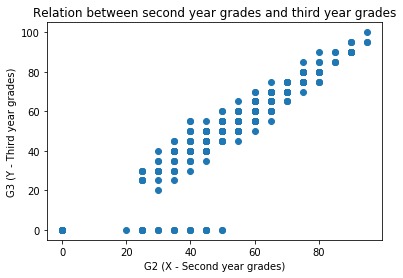

In [5]:
plt.scatter(X, Y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

#### y_pred = m * X + c

X = input/features
where m = slope and c = intercept

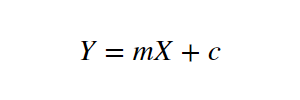

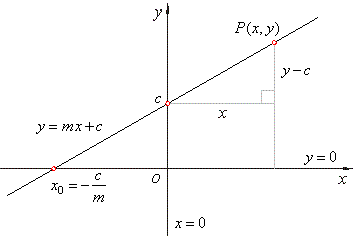

In [6]:
def predict(m, c, X):
    
    y_pred = m * X + c
    
    return y_pred

#### Mean Squared Error (Cost Function)

mse = 1/n * sum((y_pred - Y)**2)

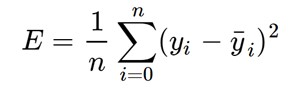

So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.

In [7]:
def mean_square_error(y_pred, Y, loss):
    n = len(y_pred)
    
    y_hat = (y_pred-Y)**2
    error = (1/len(y_hat)) * sum(y_hat)
    
    loss.append(error)
    
    return error

### Gradient Descent

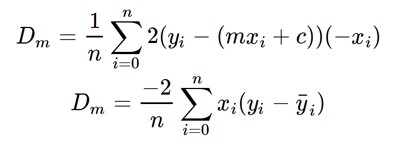

**Derivative of Cost Function wrt m**

Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :

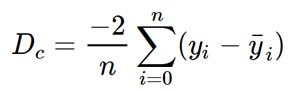

**Derivative of Cost Function wrt c**

In [8]:
def gradient_descent(X, Y, m, c):
    epochs = 100
    learning_rate = 0.0001
    
    n = len(Y)
    loss = []
    
    for i in range(epochs):
        y_pred = predict(m, c, X)
        mse = mean_square_error(y_pred, Y, loss)
        
        Dc = -2/n * sum(Y-y_pred)
        Dm = -2/n * sum(X * (Y-y_pred))
        
        m = m - learning_rate*Dm
        c = c - learning_rate*Dc
        
        # For real time update of line
        # line = m*y_pred + c
        # plt.scatter(X,Y,c='b')
        # plt.plot(X, line, c='r')
        # plt.pause(0.025)
    
    return m,c,mse,loss

In [9]:
# Initializing a random m,c
m = random.random()
c = random.random()

print("m:",m,"\nc:",c)

m_calc, c_calc, mse_calc, loss_arr = gradient_descent(X, Y, 0, 0)

m: 0.7630825821814972 
c: 0.3362645823465201


In [10]:
# Printing the values (Optional)
print(m_calc)
print(c_calc)
print(mse_calc)
print(loss_arr)

0.9863273760558274
0.00112840154613625
100.16102283008799
[3235.3164556962024, 495.9916542195846, 150.1540255176281, 106.49211519566293, 100.9796321343824, 100.28348180320832, 100.1953893887717, 100.1840637777138, 100.18242991917569, 100.18201964507635, 100.18176385640251, 100.18152758031353, 100.18129377660243, 100.18106029395778, 100.1808268607773, 100.18059344277144, 100.18036003561079, 100.18012663874806, 100.17989325211413, 100.17965987569957, 100.17942650950309, 100.17919315352381, 100.17895980776169, 100.17872647221598, 100.17849314688604, 100.17825983177194, 100.17802652687288, 100.17779323218838, 100.17755994771814, 100.17732667346178, 100.17709340941846, 100.17686015558832, 100.17662691197047, 100.17639367856476, 100.17616045537048, 100.17592724238733, 100.17569403961477, 100.17546084705243, 100.17522766469992, 100.17499449255656, 100.17476133062219, 100.17452817889597, 100.17429503737787, 100.17406190606746, 100.17382878496387, 100.17359567406695, 100.17336257337648, 100.173

#### Plotting the predicted line

In [11]:
line_pred = m_calc * X + c_calc

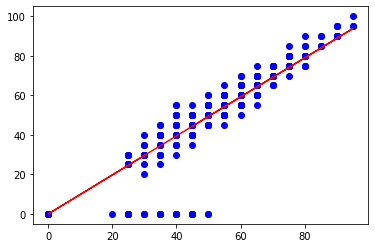

In [14]:
plt.scatter(X, Y, c='b')
plt.plot(X, line_pred, c='r')
plt.show()

#### Plotting the loss values

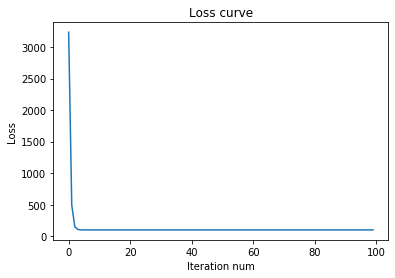

In [15]:
plt.plot([i for i in range(len(loss_arr))], loss_arr)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()